In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:16
🔁 Restarting kernel...


In [ ]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
!conda install conda-forge::spot

Channels:
 - conda-forge
Platform: linux-64
Solving environment: | / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.11.3

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda-forge::spot


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    atk-1.0-2.38.0             |       h04ea711_2         348 KB  conda-forge
    ca-certificates-2024.12.14 |       hbcca054_0         153 KB  conda-forge
    cairo-1.18.0               |       h3faef2a_0         959 KB  conda-forge
    certifi-2024.12.14         |     pyhd8ed1ab_0         158 KB  conda-forge
    expat-2.6.4                |       h5888daf_0         135 KB  conda-forge
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 KB  conda-forge

In [ ]:
import spot
print(spot.version())

2.12.1


In [ ]:
!git clone https://github.com/SYNTCOMP/benchmarks.git


Cloning into 'benchmarks'...
remote: Enumerating objects: 10827, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 10827 (delta 137), reused 131 (delta 130), pack-reused 10684 (from 2)
Receiving objects: 100% (10827/10827), 639.34 MiB | 18.71 MiB/s, done.
Resolving deltas: 100% (7352/7352), done.
Updating files: 100% (6920/6920), done.
Error downloading object: parity/keiren/FLCTLLimitClosuren=8_compact.gm.bz2.ehoa (de454d0): Smudge error: Error downloading parity/keiren/FLCTLLimitClosuren=8_compact.gm.bz2.ehoa (de454d0ab50377eac90a95672b96a619427484176c7783828d3402575d48e41d): batch response: This repository is over its data quota. Account responsible for LFS bandwidth should purchase more data packs to restore access.

Errors logged to /content/benchmarks/.git/lfs/logs/20250114T181011.897820989.log
Use `git lfs logs last` to view the log.
error: external filter 'git-lfs filter-process' failed
fatal: parity/keiren/FLCT

In [ ]:
file_path = "/content/benchmarks/parity/keiren/ABP(BW)_Onebit_(datasize=2_capacity=1_windowsize=1)eq=strong-bisim.gm.bz2.ehoa"

# Open and read the ASCII text file
with open(file_path, 'r') as file:
    content = file.read()

print(content)


HOA: v1
States: 3
Start: 0
acc-name: parity max even 3
Acceptance: 3 Inf(2) | (Fin(1) & Inf(0))
AP: 2 "pl0_0" "pl1_0"
controllable-AP: 0
properties: deterministic complete colored
--BODY--
State: 0 "vertex0" {2}
[t] 1
State: 1 "vertex1" {2}
[t] 2
State: 2 "vertex2" {1}
[t] 2
--END--



In [ ]:
!pip install networkx


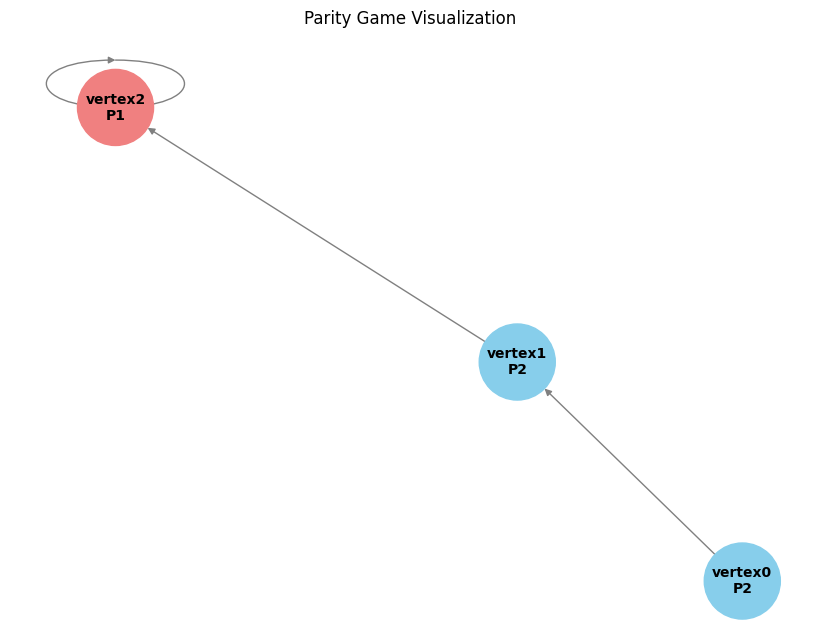

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the graph
G = nx.DiGraph()

# Add states with attributes (priority and owner)
states = {
    0: {"label": "vertex0", "priority": 2, "owner": 0},
    1: {"label": "vertex1", "priority": 2, "owner": 0},
    2: {"label": "vertex2", "priority": 1, "owner": 1},
}

for state, attrs in states.items():
    G.add_node(state, **attrs)

# Add transitions
transitions = [
    (0, 1),  # State 0 -> State 1
    (1, 2),  # State 1 -> State 2
    (2, 2),  # State 2 -> State 2
]

G.add_edges_from(transitions)

# Visualization
pos = nx.spring_layout(G)  # Layout for nodes

# Define colors for ownership
color_map = ["skyblue" if G.nodes[node]["owner"] == 0 else "lightcoral" for node in G.nodes]

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(
    G,
    pos,
    with_labels=True,
    labels={node: f"{G.nodes[node]['label']}\nP{G.nodes[node]['priority']}" for node in G.nodes},
    node_color=color_map,
    node_size=3000,
    font_size=10,
    font_weight="bold",
    edge_color="gray",
)

plt.title("Parity Game Visualization")
plt.show()


In [ ]:
import spot

def parse_controllable_ap(file_path):
    controllable_ap = set()
    with open(file_path, "r") as file:
        for line in file:
            if line.startswith("controllable-AP:"):
                ap_list = line.split(":")[1].strip()
                controllable_ap = set(map(int, ap_list.split()))
                break
    return controllable_ap


# Define the file path to your HOA file
file_path = "/content/benchmarks/parity/keiren/ABP(BW)_CABP_(datasize=2_capacity=1_windowsize=1)eq=strong-bisim.gm.bz2.ehoa"
controllable_ap = parse_controllable_ap(file_path)
print(f"Controllable AP: {controllable_ap}")

# Load the automaton from the HOA file
automata = spot.automata(file_path)

# Extract the first automaton
for aut in automata:

    print("Automaton loaded")
    print(f"Number of states: {aut.num_states()}")
    print(f"Initial state: {aut.get_init_state_number()}")
    print(f"Atomic propositions: {aut.ap()}")

    # Extract priorities from the HOA state labels
    priorities = []
    for state in range(aut.num_states()):
        # Determine the highest acceptance set in outgoing transitions
        max_priority = max(
            (max(edge.acc.sets()) for edge in aut.out(state) if edge.acc.sets()), default=0
        )
        priorities.append(max_priority)


    # Zielonka's algorithm implementation
    def zielonka_algorithm(aut, priorities):
        num_states = aut.num_states()
        winning_region = {}
        strategy = {}

        # Find the dominion of a player based on the priority
        def find_dominion(player):
            dominion = set()
            for state in range(num_states):
                if priorities[state] % 2 == player:
                    dominion.add(state)
            return dominion

        # Step 1: Player 0 (even) dominates
        dominion_0 = find_dominion(0)
        for state in dominion_0:
            winning_region[state] = 0  # Player 0 wins from these states
            # Add the winning strategy for Player 0
            for edge in aut.out(state):
                if priorities[edge.dst] % 2 == 0:
                    strategy[state] = edge.dst
                    break

        # Step 2: Player 1 (odd) dominates
        dominion_1 = find_dominion(1)
        for state in dominion_1:
            if state not in winning_region:  # If not already won by Player 0
                winning_region[state] = 1  # Player 1 wins from these states
                # Add the winning strategy for Player 1
                for edge in aut.out(state):
                    if priorities[edge.dst] % 2 == 1:
                        strategy[state] = edge.dst
                        break

        return winning_region, strategy

    # Run Zielonka's algorithm
    winning_region, strategy = zielonka_algorithm(aut, priorities)

    # Print the results
    print("\n--- winnig regions ---")
    for state in winning_region:
        winner = "Player 0 (even)" if winning_region[state] == 0 else "Player 1 (odd)"
        print(f"State {state}: {winner} wins")

    print("\n--- Strategies ---")
    for state in strategy:
        print(f"From State {state}, move to State {strategy[state]} to guarantee a win")

Controllable AP: {0}
Automaton successfully loaded from the HOA file.
Number of states: 3
Initial state: 0
Atomic propositions: (spot.formula("pl0_0"), spot.formula("pl1_0"))

--- Detailed Output ---
State 0: Player 0 (even) wins
State 1: Player 0 (even) wins
State 2: Player 1 (odd) wins

--- Strategies ---
From State 0, move to State 1 to guarantee a win
From State 2, move to State 2 to guarantee a win
